# Your name: Krissy Wong
## Assignment Name: CA05 - Logistic Regression




##1. The Application
####Cardiovascular Disease (CVD) kills more people than cancer globally. A dataset of real heart patients collected from a 15 year heart study cohort is made available for this assignment. The dataset has 16 patient features. Note that none of the features include any Blood Test information.

##2. Deliverables
#### Part 1: build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible (deliverable: Notebook)

###### Data Inspection and Quality Analysis 


In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# Read datasets and look at the head(5) of the data 
cvd_data = pd.read_csv('/gdrive/MyDrive/BSAN6070/CA05/cvd_data.csv')
cvd_data.head(5)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [4]:
# Look at the tail of the dataset 
cvd_data.tail(5)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


In [5]:
# Describes the data according to count, mean, std, min, 25%, 50%, 75%, and max

cvd_data.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [6]:
# Verify the shape of the data to see the columns and rows 

cvd_data.shape

(3242, 17)

In [7]:
# Look at the count of records for each column in the dataset 

cvd_data.count()

cvd_4types      3242
age_s1          3242
race            3242
educat          3242
mstat           3242
hip             3242
neck20          3242
waist           3242
av_weight_kg    3242
cgpkyr          3242
tea15           3242
srhype          3242
parrptdiab      3242
bend25          3242
happy25         3242
tired25         3242
hlthlm25        3242
dtype: int64

In [8]:
# Check all the column types 

cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [9]:
# Check for null values in the data 

cvd_data.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [10]:
# Check for duplicate values 

cvd_data.duplicated().sum()

0

##### Data Processing

In [11]:
# Count of unique values in CVD risk
cvd_data["cvd_4types"].value_counts()

1    1913
0    1329
Name: cvd_4types, dtype: int64

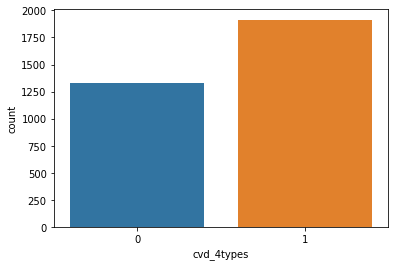

In [12]:
cvd_plot = sns.countplot(x = "cvd_4types", data = cvd_data)

In [13]:
# Check for multicollinearity in dataset 

cvd_data.corr(method = "pearson")

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
cvd_4types,1.000000,0.089168,-0.143843,0.053662,-0.076659,0.018482,0.101653,0.203104,0.058616,0.037151,-0.028436,0.071819,0.074406,-0.009653,-0.033048,0.022130,-0.126168
age_s1,0.089168,1.000000,0.000626,-0.207595,0.013170,-0.121743,-0.001135,0.086363,0.073152,0.072336,-0.007279,0.268032,0.140819,-0.224303,-0.044323,0.012448,-0.164790
race,-0.143843,0.000626,1.000000,-0.061934,0.058878,0.030535,-0.010810,0.012960,0.045118,-0.040240,-0.005746,0.053822,0.079818,-0.064647,0.005103,-0.014226,-0.117117
educat,0.053662,-0.207595,-0.061934,1.000000,0.026047,-0.008162,0.000856,-0.057212,-0.052692,-0.047632,0.022097,-0.110072,-0.117066,0.166887,-0.093659,0.079794,0.096398
mstat,-0.076659,0.013170,0.058878,0.026047,1.000000,0.012425,-0.078962,-0.044175,-0.046429,-0.006983,0.012250,-0.002689,0.012210,-0.016304,0.033619,-0.031645,-0.055162
hip,0.018482,-0.121743,0.030535,-0.008162,0.012425,1.000000,0.321828,0.710743,0.428565,-0.006662,0.003894,0.121578,0.085835,-0.229975,0.029561,-0.131190,-0.096214
neck20,0.101653,-0.001135,-0.010810,0.000856,-0.078962,0.321828,1.000000,0.617500,0.525890,0.190235,0.022729,0.105139,0.118303,-0.091327,0.008170,0.002945,-0.010144
waist,0.203104,0.086363,0.012960,-0.057212,-0.044175,0.710743,0.617500,1.000000,0.641330,0.112615,0.014916,0.201122,0.134582,-0.246275,0.020475,-0.091524,-0.111527
av_weight_kg,0.058616,0.073152,0.045118,-0.052692,-0.046429,0.428565,0.525890,0.641330,1.000000,0.111671,0.013763,0.196695,0.094746,-0.155036,0.028020,-0.054466,-0.015056
cgpkyr,0.037151,0.072336,-0.040240,-0.047632,-0.006983,-0.006662,0.190235,0.112615,0.111671,1.000000,0.000500,0.013163,0.044049,-0.056544,0.026469,-0.051990,-0.030523


In [14]:
# Drop "hip" column because it is highly correlated with "waist" with a multicollinearity of 0.7107
cvd_data = cvd_data.drop(['hip'], axis = 1)

In [15]:
# Check the head of the data 
cvd_data.head(5)

,cvd_4types,age_s1,race,educat,mstat,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


##### Model 1: Fit a Logistic Model 

In [16]:
# Selecting independent and dependent variables 
X = cvd_data.drop('cvd_4types', axis = 1)
y = cvd_data['cvd_4types']

In [17]:
# Train Test Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)


In [18]:
# Fit (train) the Logistic Regression Classifier
clf = linear_model.LogisticRegression(C = 1e40, solver = 'newton-cg')
fitted_model = clf.fit(X_train, y_train)

In [19]:
# Predict the result from the clf and print the accuracy score
y_pred = clf.predict(X_test)
accuracy = fitted_model.score(X_test, y_test)
print("Accuracy score is", accuracy)

Accuracy score is 0.6834532374100719


#####Model 2: Create a new Logistic Model using regularization of the penalty  

In [20]:
# Create a new logistic model using a penalty to regularize
clf_1 = linear_model.LogisticRegression(solver='newton-cg',random_state= 99, penalty= 'l2')
fitted_model_1 = clf_1.fit(X_train,y_train)

In [21]:
# Predict the result from the clf_1 and print the accuracy score 
y_pred = clf_1.predict(X_test)
accuracy_1 = fitted_model_1.score(X_test, y_test)
print("Accuracy score is", accuracy_1)

Accuracy score is 0.6834532374100719


###### Model 3: Further tune the Logistic Model by adjusting the C values 

In [22]:
# Set up the logistic model
logistic_model = linear_model.LogisticRegression()

# Tune the hyperparameter using regularization of the penalty 
penalty = ['l1', 'l2']

# Set C values to a uniform distribution 
c = uniform(loc = 0, scale = 4)

# Generating the hyperparameters 
hyperparameter = dict(C = c, penalty = penalty)

In [24]:
# Use a randomized seach 
clf_2 = RandomizedSearchCV(logistic_model, hyperparameter, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [26]:
# Fit the randomized search 
model_optimum = clf_2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [27]:
# Find the optimum Hyperparameter and C value 
print("The Optimum Hyperparameter is", model_optimum.best_estimator_.get_params()["penalty"])
print("The Optimum C is", model_optimum.best_estimator_.get_params()["C"])

The Optimum Hyperparameter is l2
The Optimum C is 0.8884981901414992


In [28]:
# Predict the result from model_optimum and print the accuracy score
y_pred = model_optimum.predict(X_test)
accuracy_2 = model_optimum.score(X_test, y_test)
print("Accuracy score is", accuracy_2)

Accuracy score is 0.6896197327852004


#### Part 2: Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk (deliverable: Notebook)

In [29]:
# Fit the model using the optimal hyperparameter and C value from the previous section 

best_model = linear_model.LogisticRegression(random_state=100, penalty='l2', C = 0.8884981901414992, solver='newton-cg')
best_model.fit(X_train/np.std(X_train, 0), y_train)

# Sort by Feature Importance 
importance = (np.std(X_train, 0)*best_model.coef_[0])
importance.sort_values(ascending = False)

waist           8.152114
age_s1          1.161656
cgpkyr          0.719670
educat          0.133981
tired25         0.133516
bend25          0.051273
parrptdiab      0.035102
srhype          0.026032
tea15          -0.058014
happy25        -0.065004
race           -0.112651
mstat          -0.127521
hlthlm25       -0.221210
neck20         -0.306609
av_weight_kg   -1.336443
dtype: float64

#### Part 3: Evaluate the performance of your model (including ROC Curve), explain the performance anddraw a meaningful conclusion. (deliverable: Performance outputs in Notebook, explanation and conclusion in Word/PDF document)

In [30]:
# Print a classification report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.46      0.56       415
           1       0.68      0.86      0.76       558

    accuracy                           0.69       973
   macro avg       0.70      0.66      0.66       973
weighted avg       0.69      0.69      0.67       973



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')

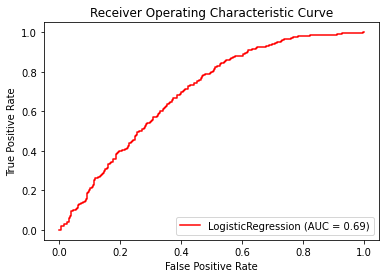

In [31]:
# Plot the ROC curve 

plot_roc_curve(clf, X_test, y_test, color = "red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")

In [32]:
# Print the ROC AUC curve 
accuracy_best = accuracy_score(y_test, y_pred)
print("Accuracy score is",accuracy_best)

y_pred_prob = best_model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("AUC score is" , roc_auc)

Accuracy score is 0.6896197327852004
AUC score is 0.6596104849505549
